In [14]:
import pandas as pd
import numpy as np

In [17]:
data_url = 'https://archive.ics.uci.edu/static/public/352/data.csv'
df = pd.read_csv(data_url)
print(df.shape)
print(df.columns)

(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


# Renaming Columns

In [19]:
df = df.rename(columns={
    'InvoiceNo':'Invoice_No',
    'StockCode':'Stock_Code',
    'InvoiceDate':'Date',
    'UnitPrice':'Unit_Price',
    'CustomerID':'Customer_ID',
    })
print(df.columns)

Index(['Invoice_No', 'Stock_Code', 'Description', 'Quantity', 'Date',
       'Unit_Price', 'Customer_ID', 'Country'],
      dtype='object')


# Type Casting

In [20]:
df.dtypes

Invoice_No      object
Stock_Code      object
Description     object
Quantity         int64
Date            object
Unit_Price     float64
Customer_ID    float64
Country         object
dtype: object

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handeling Null Valures

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice_No   541909 non-null  object        
 1   Stock_Code   541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   Date         541909 non-null  datetime64[ns]
 5   Unit_Price   541909 non-null  float64       
 6   Customer_ID  406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [26]:
df.isnull().sum()

Invoice_No          0
Stock_Code          0
Description      1454
Quantity            0
Date                0
Unit_Price          0
Customer_ID    135080
Country             0
dtype: int64

In [27]:
(df.isnull().sum() / df.shape[0] * 100).map(lambda x: f"{x:.2f}%")

Invoice_No      0.00%
Stock_Code      0.00%
Description     0.27%
Quantity        0.00%
Date            0.00%
Unit_Price      0.00%
Customer_ID    24.93%
Country         0.00%
dtype: object

In [28]:
# Since a very small % of description is empty we will leave it as it is 
# but fill the Customer ID with a placeholder as it has many null values
df['Customer_ID'].fillna('Unknown', inplace=True)


C:\Users\ghazi\AppData\Local\Temp\ipykernel_17816\3182233550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_ID'].fillna('Unknown', inplace=True)
C:\Users\ghazi\AppData\Local\Temp\ipykernel_17816\3182233550.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Customer_ID'].fillna('Unknown', inplace=True)


In [29]:
print(f"Shape of the Data: {df.shape},\n\nNumber of Null Values {df.isnull().sum()}")

Shape of the Data: (541909, 8),

Number of Null Values Invoice_No        0
Stock_Code        0
Description    1454
Quantity          0
Date              0
Unit_Price        0
Customer_ID       0
Country           0
dtype: int64


# Feature Engineering

In [30]:
# Extract time-based features
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()  # 0: Monday, 6: Sunday
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['DayOfMonth'] = df['Date'].dt.day

In [31]:
df['Total_Revenue'] = df['Quantity']*df['Unit_Price']

# Handeling Duplicates

In [32]:
# We are not going to remove these duplicates as there may be many purchases by a single customer which are entered separately.
# Removing them will also lead to loss of valueable information
df.duplicated().sum()

np.int64(5268)

# Detecting Outliers by IQR

In [480]:
df.describe(include='all')

,Invoice_No,Stock_Code,Description,Quantity,Date,Unit_Price,Customer_ID,Country,DayOfWeek,Month,Year,Quarter,DayOfMonth,Total_Revenue
count,541909,541909,540455,541909.000000,541909,541909.000000,541909,541909,541909,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
unique,25900,4070,4223,NaN,NaN,NaN,4373,38,6,NaN,NaN,NaN,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,Unknown,United Kingdom,Thursday,NaN,NaN,NaN,NaN,NaN
freq,1114,2313,2369,NaN,NaN,NaN,135080,495478,103857,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,NaN,NaN,NaN,7.553128,2010.921609,2.834723,15.023096,17.987795
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN,NaN,NaN,1.000000,2010.000000,1.000000,1.000000,-168469.600000
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,NaN,NaN,NaN,5.000000,2011.000000,2.000000,7.000000,3.400000
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,NaN,NaN,NaN,8.000000,2011.000000,3.000000,15.000000,9.750000
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,NaN,NaN,NaN,11.000000,2011.000000,4.000000,22.000000,17.400000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN,NaN,12.000000,2011.000000,4.000000,31.000000,168469.600000


In [33]:
# Calculate IQR for each column
Q1 = df[['Quantity', 'Unit_Price', 'Total_Revenue']].quantile(0.25)
Q3 = df[['Quantity', 'Unit_Price', 'Total_Revenue']].quantile(0.75)
IQR = Q3 - Q1

# Define the condition for outliers
iqr_outliers = ((df[['Quantity', 'Unit_Price', 'Total_Revenue']] < (Q1 - 1.5 * IQR)) | 
            (df[['Quantity', 'Unit_Price', 'Total_Revenue']] > (Q3 + 1.5 * IQR)))

# Display rows with outliers
outlier_rows = df[iqr_outliers.any(axis=1)]
print(outlier_rows)
print()
print('Total Number of Outliers:', outlier_rows.shape)

       Invoice_No Stock_Code                       Description  Quantity  \
9          536367      84879     ASSORTED COLOUR BIRD ORNAMENT        32   
16         536367      22622    BOX OF VINTAGE ALPHABET BLOCKS         2   
26         536370      22728         ALARM CLOCK BAKELIKE PINK        24   
27         536370      22727         ALARM CLOCK BAKELIKE RED         24   
28         536370      22726        ALARM CLOCK BAKELIKE GREEN        12   
...           ...        ...                               ...       ...   
541882     581585      21916   SET 12 RETRO WHITE CHALK STICKS        24   
541883     581585      84692       BOX OF 24 COCKTAIL PARASOLS        25   
541891     581586      23275  SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892     581586      21217     RED RETROSPOT ROUND CAKE TINS        24   
541893     581586      20685             DOORMAT RED RETROSPOT        10   

                      Date  Unit_Price Customer_ID         Country  DayOfWeek  \
9     

In [39]:
# Count the number of outliers for each column separately
quantity_outliers = iqr_outliers['Quantity'].sum()
unit_price_outliers = iqr_outliers['Unit_Price'].sum()
total_revenue_outliers = iqr_outliers['Total_Revenue'].sum()

print(f"Number of outliers in 'Quantity': {quantity_outliers}")
print(f"Number of outliers in 'Unit_Price': {unit_price_outliers}")
print(f"Number of outliers in 'Total_Revenue': {total_revenue_outliers}")


Number of outliers in 'Quantity': 58619
Number of outliers in 'Unit_Price': 39627
Number of outliers in 'Total_Revenue': 44997


# Data Visualization to Analyze Outliers

In [35]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Price Outliers

Total +ive Price Values: 120
Total -ive Price Values:2


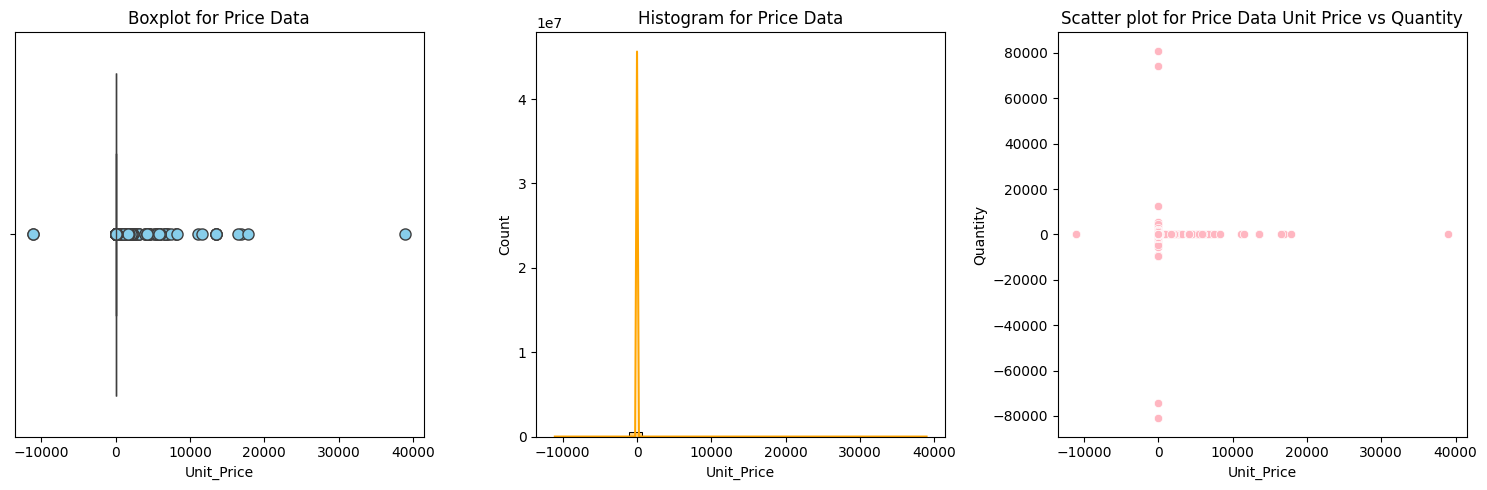

In [40]:
# Total +ive Values in Price
price_pos_outlier = df[df['Unit_Price']>1000]
print('Total +ive Price Values:', price_pos_outlier.shape[0])

# Total -ive Values in Price
price_neg_outlier = df[df['Unit_Price']<0]
print(f'Total -ive Price Values:{price_neg_outlier.shape[0]}')

# Boxplot with light pink outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Unit_Price'], flierprops=dict(markerfacecolor= 'skyblue', marker='o', markersize=8))
plt.title('Boxplot for Price Data')

# Histogram with orange color
plt.subplot(1, 3, 2)
sns.histplot(x=df['Unit_Price'], kde=True, bins=30, color='orange')
plt.title('Histogram for Price Data')

# Scatter plot with light pink outliers
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['Unit_Price'], y=df['Quantity'], color='lightpink')
plt.title('Scatter plot for Price Data Unit Price vs Quantity')

# Layout adjustments
plt.tight_layout()
plt.show()

### Quantity Outliers


Shape of +ive Quantity above 1000: 116
Shape of -ive Quantity Values:10624


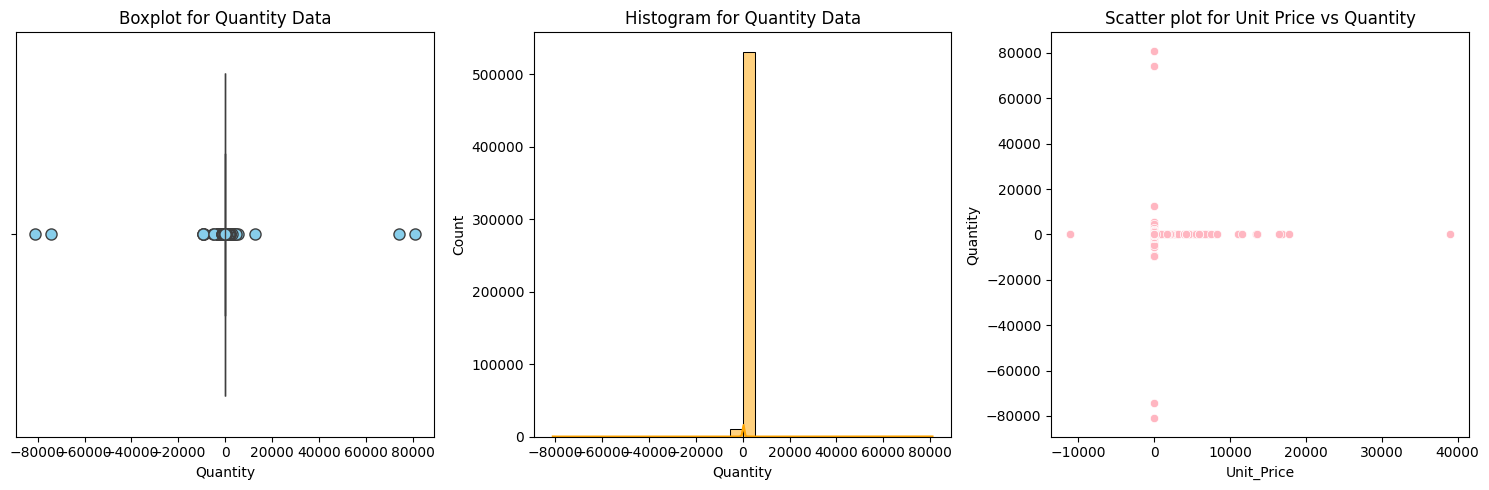

In [41]:
# Total +ive Values in Quantity
quan_pos_outlier = df[df['Quantity']>1000]
print('Shape of +ive Quantity above 1000:',quan_pos_outlier.shape[0])

# Total -ive values in Quantity
quan_neg_outlier = df[df['Quantity']<0]
print(f'Shape of -ive Quantity Values:{quan_neg_outlier.shape[0]}')

# Boxplot with light pink outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Quantity'], flierprops=dict(markerfacecolor= 'skyblue', marker='o', markersize=8))
plt.title('Boxplot for Quantity Data')

# Histogram with orange color
plt.subplot(1, 3, 2)
sns.histplot(x=df['Quantity'], kde=True, bins=30, color='orange')
plt.title('Histogram for Quantity Data')

# Scatter plot with light pink outliers
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['Unit_Price'], y=df['Quantity'], color='lightpink')
plt.title('Scatter plot for Unit Price vs Quantity')

# Layout adjustments
plt.tight_layout()
plt.show()

### Revenue Outliers

Shape of +ive Quantity above 1000: 388
Shape of -ive Quantity Values:9290


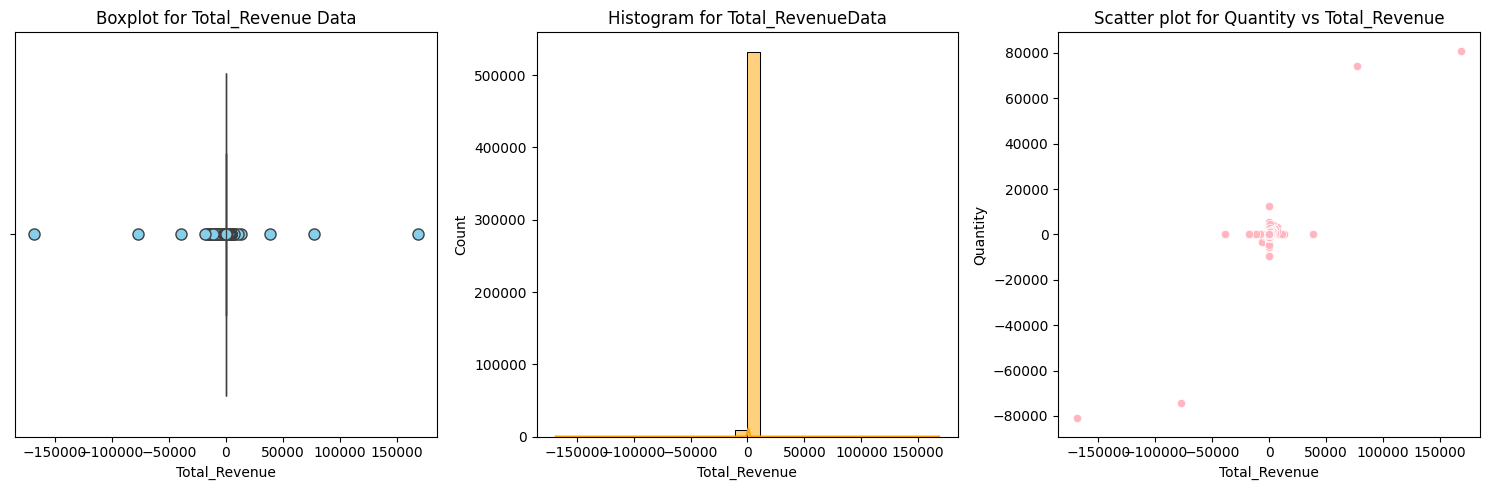

In [42]:
# Total +ive Values in Revenue
rev_pos_outlier = df[df['Total_Revenue']>1000]
print('Shape of +ive Quantity above 1000:',rev_pos_outlier.shape[0])

# Total -ive values in Revenue
rev_neg_outlier = df[df['Total_Revenue']<0]
print(f'Shape of -ive Quantity Values:{rev_neg_outlier.shape[0]}')

# Boxplot with light pink outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Total_Revenue'], flierprops=dict(markerfacecolor= 'skyblue', marker='o', markersize=8))
plt.title('Boxplot for Total_Revenue Data')

# Histogram with orange color
plt.subplot(1, 3, 2)
sns.histplot(x=df['Total_Revenue'], kde=True, bins=30, color='orange')
plt.title('Histogram for Total_RevenueData')

# Scatter plot with light pink outliers
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['Total_Revenue'], y=df['Quantity'], color='lightpink')
plt.title('Scatter plot for Quantity vs Total_Revenue')

# Layout adjustments
plt.tight_layout()
plt.show()

You must have noticed that outliers in Total_Revenue is due to the -ive values in Quantity.

## Detecting Outliers with Z-Score
Since IQR is giving us so many outliers due to the variability in the dataset so Z-score would be more suitable.

In [43]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Z-scores for the specified columns
z_scores = df[['Quantity', 'Unit_Price', 'Total_Revenue']].apply(zscore)

# Define a threshold for outliers (commonly 3 or -3)
threshold = 3

# Identify rows where any Z-score exceeds the threshold
outliers = (z_scores.abs() > threshold).any(axis=1)

# Add the outliers column to the DataFrame
df['Outlier'] = outliers

# Count the number of outliers
outlier_count = outliers.sum()

print(f"Number of outliers: {outlier_count}")



Number of outliers: 912


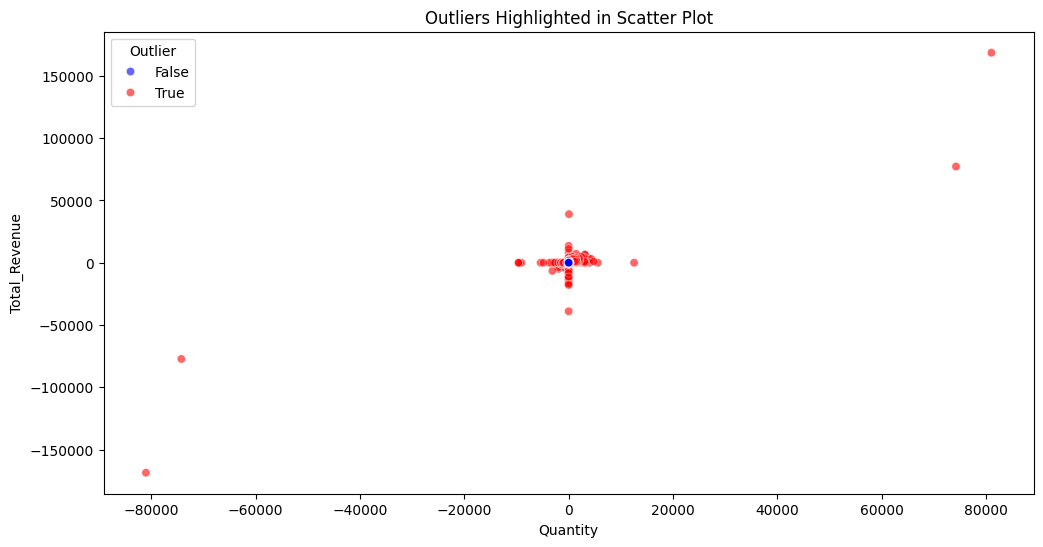

In [44]:
# Scatter plot to visualize outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Quantity', 
    y='Total_Revenue',
    hue='Outlier',  # Use the 'Outlier' column for coloring
    palette={True: 'red', False: 'blue'},  # Red for outliers, blue for non-outliers
    alpha=0.6
)
plt.title('Outliers Highlighted in Scatter Plot')
plt.legend(title='Outlier')
plt.show()

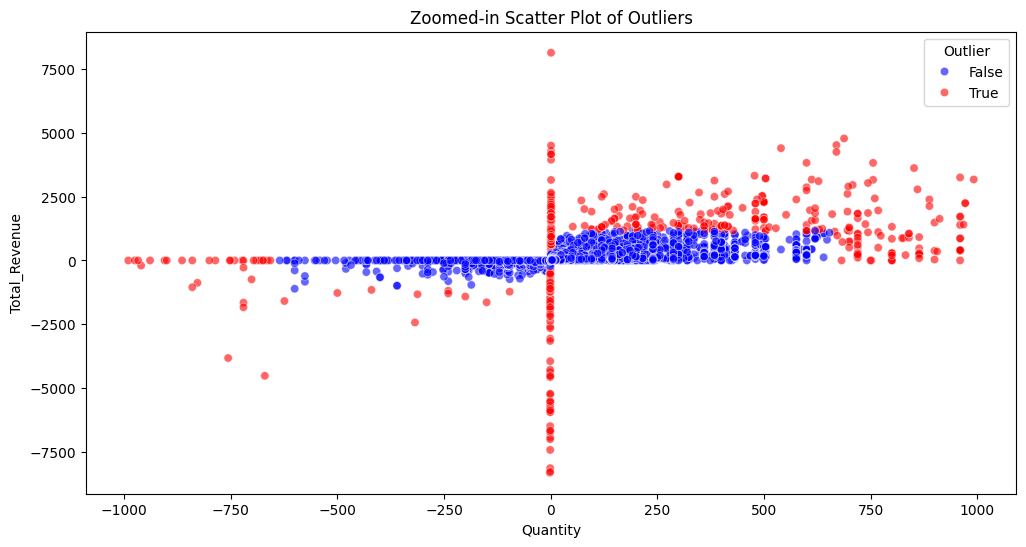

In [45]:
# Focus on a subset of data to zoom in
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df[(df['Total_Revenue'] > -10000) & (df['Total_Revenue'] < 10000) & 
            (df['Quantity'] > -1000) & (df['Quantity'] < 1000)],
    x='Quantity', 
    y='Total_Revenue',
    hue='Outlier',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)
plt.title('Zoomed-in Scatter Plot of Outliers')
plt.legend(title='Outlier')
plt.show()

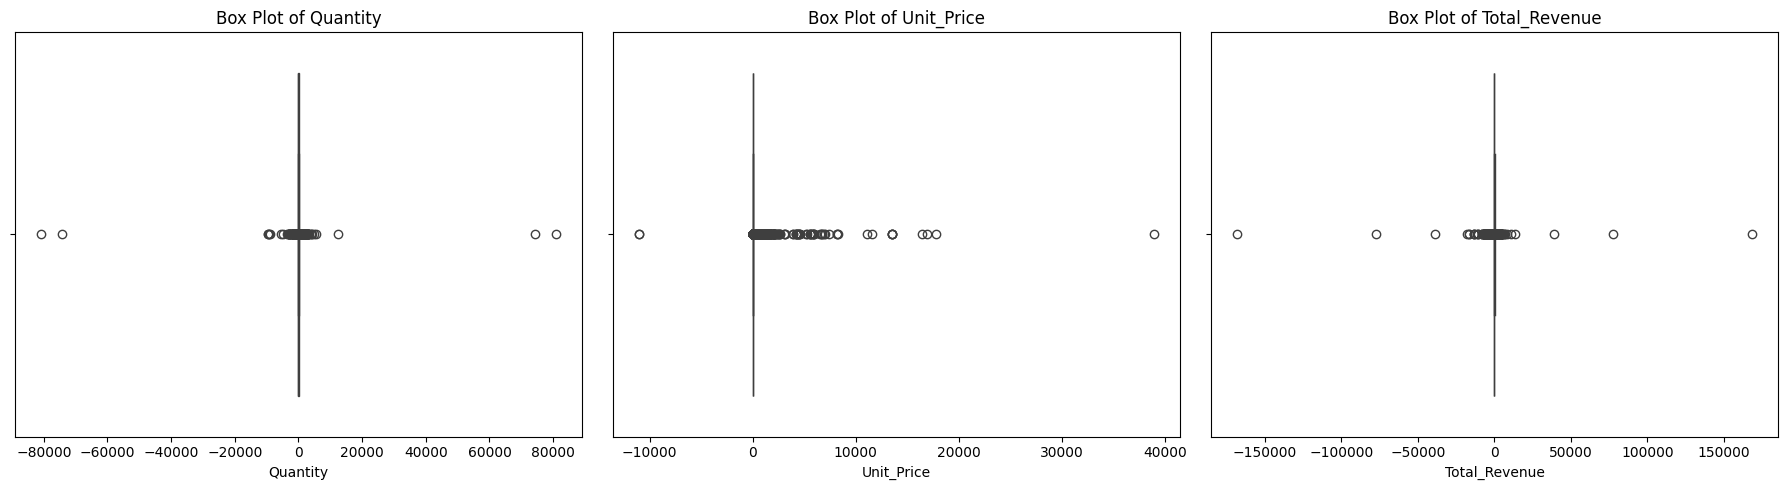

In [46]:
# Box plot visualization
plt.figure(figsize=(18, 5))
columns = ['Quantity', 'Unit_Price', 'Total_Revenue']
for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Splitting data
  Separating data based on Year. Since we have data of 2010 and 2011 analize them separately would be a good option.

In [49]:
df_2010 = df[df['Year']==2010]
df_2011 = df[df['Year']==2011]

print('2010 data shape:' , df_2010.shape)
print('2010 Months:', df_2010['Month'].value_counts())
print()
print('2011 data shape:', df_2011.shape)
print('Months of 2011:', df_2011['Month'].value_counts().sort_values(ascending=False))

2010 data shape: (42481, 15)
2010 Months: Month
12    42481
Name: count, dtype: int64

2011 data shape: (499428, 15)
Months of 2011: Month
11    84711
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
12    25525
Name: count, dtype: int64


Since we have only one month of 2010 (December), We are not going to separate the dataset based on Year.

### Splitting Data by Low, Medium and High Prices.

In [58]:
low_price_df = df[df['Unit_Price']<= 10]
med_price_df = df[(df['Unit_Price']>10) & (df['Unit_Price']<=100)]
high_price_df = df[df['Unit_Price']>100]
print(f'Low Price Data Shape (0-10): {low_price_df.shape}\nMedium Price Data Shape (10-100): {med_price_df.shape}\nHigh Price Data Shape (100-3000): {high_price_df.shape}')

Low Price Data Shape (0-10): (516890, 15)
Medium Price Data Shape (10-100): (23983, 15)
High Price Data Shape (100-3000): (1036, 15)


In [59]:

# Function to find outliers using IQR for a given DataFrame and column
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in low-price, medium-price, and high-price groups
low_price_outliers = find_outliers(low_price_df, 'Unit_Price')
med_price_outliers = find_outliers(med_price_df, 'Unit_Price')
high_price_outliers = find_outliers(high_price_df, 'Unit_Price')

# Print the number of outliers
print(f"Number of Low Price Outliers (<=10): {low_price_outliers.shape[0]}")
print(f"Number of Medium Price Outliers (10-100): {med_price_outliers.shape[0]}")
print(f"Number of High Price Outliers (>100): {high_price_outliers.shape[0]}")


Number of Low Price Outliers (<=10): 32102
Number of Medium Price Outliers (10-100): 2456
Number of High Price Outliers (>100): 120


### DataFrame 1: Low Priced Data

Number of Low Priced Outliers (<=10): 32102


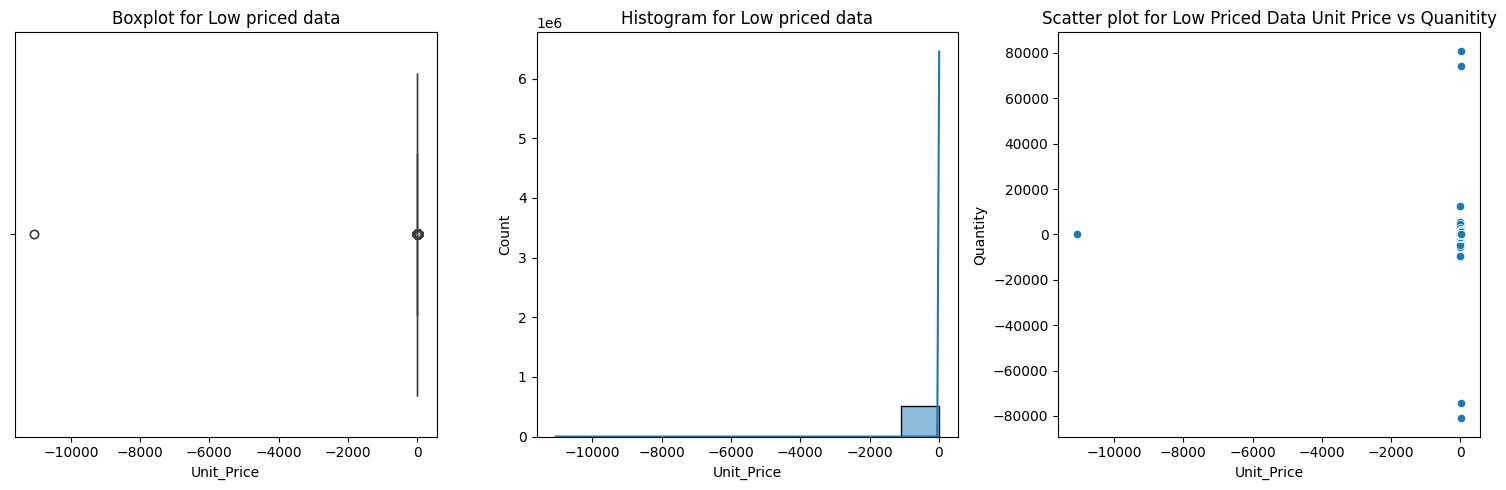

In [60]:
#Its time to visualize all the three datasets' outliers separately

print(f"Number of Low Priced Outliers (<=10): {low_price_outliers.shape[0]}")

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(x=low_price_df['Unit_Price'])
plt.title('Boxplot for Low priced data')

plt.subplot(1, 3, 2)
sns.histplot(low_price_df['Unit_Price'], kde=True, bins=10)
plt.title('Histogram for Low priced data')

plt.subplot(1, 3, 3)
sns.scatterplot(x=low_price_df['Unit_Price'], y=low_price_df['Quantity'])
plt.title('Scatter plot for Low Priced Data Unit Price vs Quanitity')

plt.tight_layout()
plt.show()


# Handling Outliers for Low Priced Data


For Low Priced Data 

Methode 1: Capping/Winsorization by adjusting the upper bound we saved our most of the data and got rid of outliers. First lower_bound was 0.05 and upper_boound was 0.95.
But we see that outliers before and after capping were same. After adjusting to lower=0.05 and upper=0.93 we successfully removed outliers.

Number of IQR method outliers before capping: 32102
Number of IQR method outliers after capping: 0


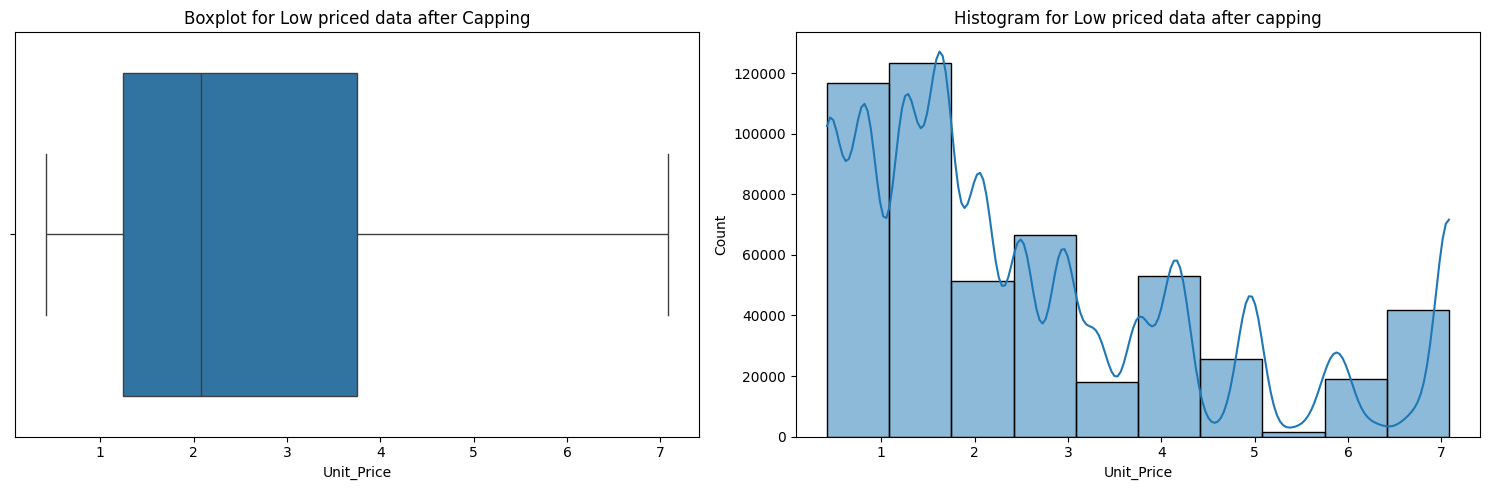

In [62]:
lower_bound = low_price_df['Unit_Price'].quantile(0.05)
upper_bound = low_price_df['Unit_Price'].quantile(0.93)   
# Cap values
capping = low_price_df['Unit_Price'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_capped = capping.quantile(0.25)
Q3_capped = capping.quantile(0.75)
IQR_capped = Q3_capped - Q1_capped

lower_limit_capped = Q1_capped - 1.5 * IQR_capped
upper_limit_capped = Q3_capped + 1.5 * IQR_capped

# Identify outliers based on IQR method
print(f"Number of IQR method outliers before capping: {low_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after = capping[(capping < lower_limit_capped) | (capping > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=capping)
plt.title('Boxplot for Low priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(capping, kde=True, bins=10)
plt.title('Histogram for Low priced data after capping')

plt.tight_layout()
plt.show()


Method 2: Log Transformation

Purpose: Reduce the skewness of data caused by large outliers, useful when the data has a long tail or positive skewness.

c:\Users\ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Number of Outliers before Log Transformation: 32102
Number of Outliers after Log Transformation: 0
Number of Data Points Removed 0


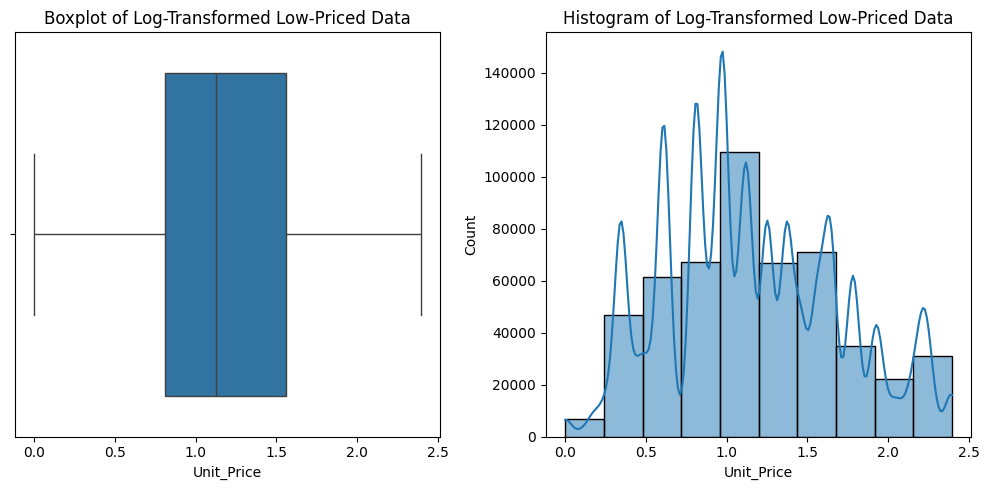

In [64]:
# Apply log transformation
log_trans = np.log1p(low_price_df['Unit_Price'])  # Use log1p to handle zeros

# Calculate IQR on the transformed data
Q1_log = log_trans.quantile(0.25)  # Use the transformed column
Q3_log = log_trans.quantile(0.75)
IQR_log = Q3_log - Q1_log

# Define lower and upper limits for outliers
lower_limit_log = Q1_log - 1.5 * IQR_log
upper_limit_log = Q3_log + 1.5 * IQR_log

# Identify outliers after log transformation
outliers_after_log = log_trans[(log_trans < lower_limit_log) | (log_trans > upper_limit_log)]

# Number of Outliers
print(f"Number of Outliers before Log Transformation: {low_price_outliers.shape[0]}")
print(f"Number of Outliers after Log Transformation: {outliers_after_log.shape[0]}")
print(f"Number of Data Points Removed {low_price_df.shape[0]-log_trans.shape[0]}")

# Plot the data0
plt.figure(figsize=(10, 5))

# Boxplot for transformed data
plt.subplot(1, 2, 1)
sns.boxplot(x=log_trans)
plt.title('Boxplot of Log-Transformed Low-Priced Data')

# Histogram for transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_trans, kde=True, bins=10)
plt.title('Histogram of Log-Transformed Low-Priced Data')

plt.tight_layout()
plt.show()


### Applying Capping to the original Data

Capping is the method that is chose as it retain the variablity of the data.

C:\Users\ghazi\AppData\Local\Temp\ipykernel_17816\1225923867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price_df['Unit_Price'] = low_price_df['Unit_Price'].clip(lower_bound, upper_bound)


Number of IQR method outliers before capping: 32102
Number of IQR method outliers after capping: 0


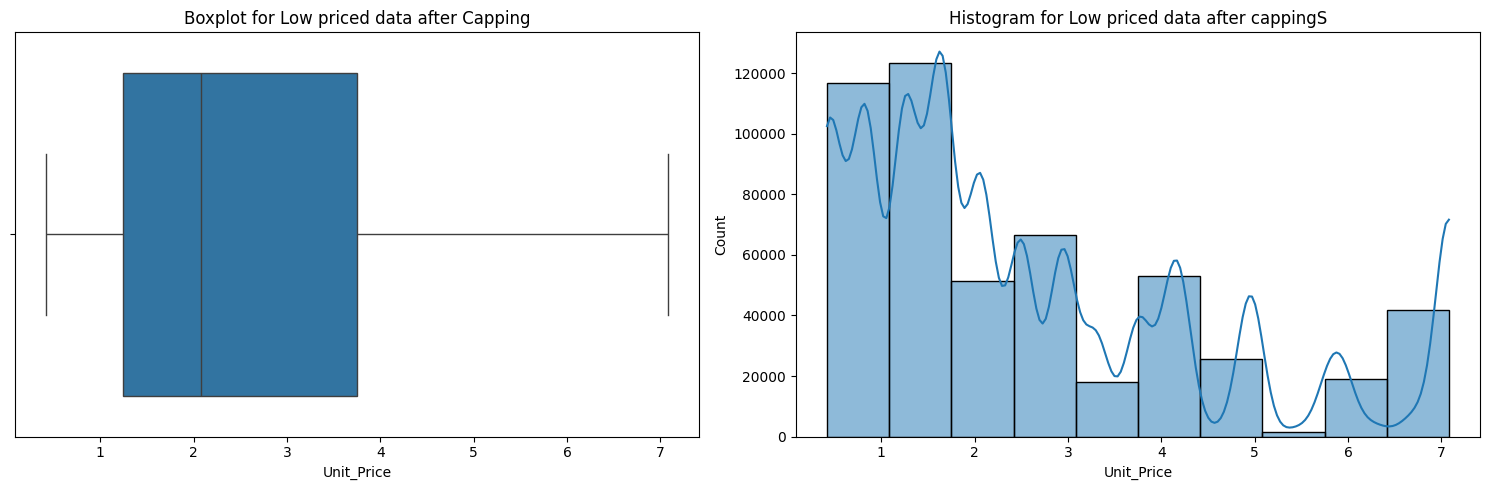

In [65]:
lower_bound = low_price_df['Unit_Price'].quantile(0.05)
upper_bound = low_price_df['Unit_Price'].quantile(0.93)   

# Cap values
low_price_df['Unit_Price'] = low_price_df['Unit_Price'].clip(lower_bound, upper_bound)

# Identify outliers based on IQR method
print(f"Number of IQR method outliers before capping: {low_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after = capping[(capping < lower_limit_capped) | (capping > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=low_price_df['Unit_Price'])
plt.title('Boxplot for Low priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(low_price_df['Unit_Price'], kde=True, bins=10)
plt.title('Histogram for Low priced data after cappingS')

plt.tight_layout()
plt.show()


Quantity Outliers Handling

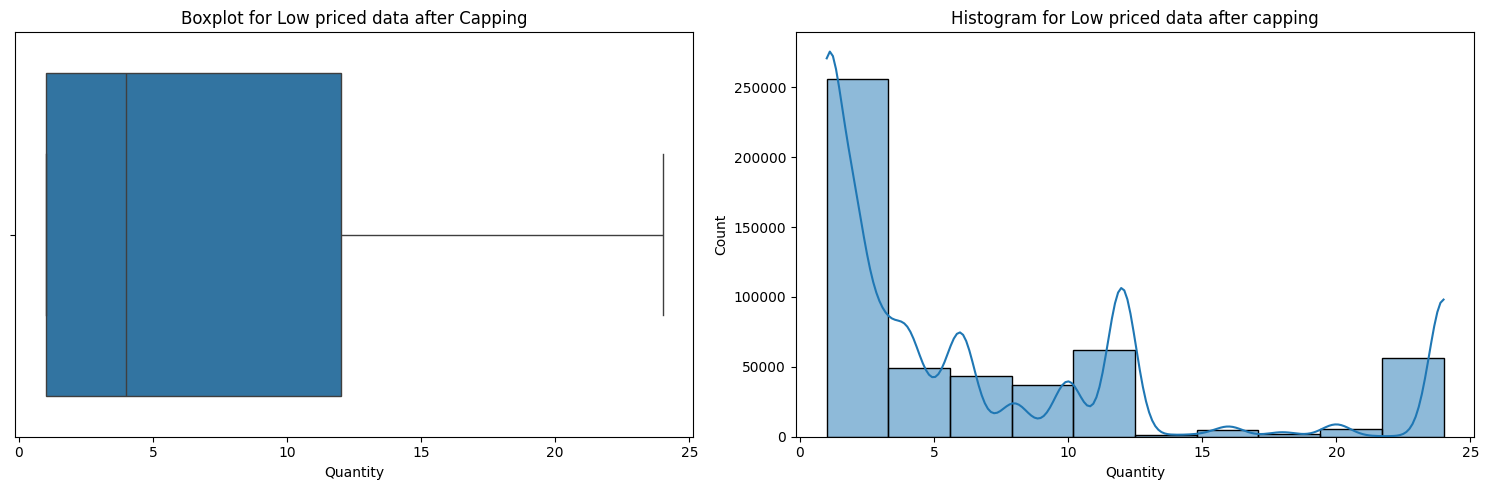

In [66]:
lower_bound = low_price_df['Quantity'].quantile(0.05)
upper_bound = low_price_df['Quantity'].quantile(0.90)   
# Cap values
quan_capping = low_price_df['Quantity'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_quan_capped = quan_capping.quantile(0.25)
Q3_quan_capped =  quan_capping.quantile(0.75)
IQR_quan_capped = Q3_quan_capped - Q1_quan_capped

lower_limit_capped = Q1_quan_capped - 1.5 * IQR_quan_capped
upper_limit_capped = Q3_quan_capped + 1.5 * IQR_quan_capped



# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=quan_capping)
plt.title('Boxplot for Low priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(quan_capping, kde=True, bins=10)
plt.title('Histogram for Low priced data after capping')

plt.tight_layout()
plt.show()


# Medium Priced Data

Number of Medium Priced Data Outliers (10-100): 2456


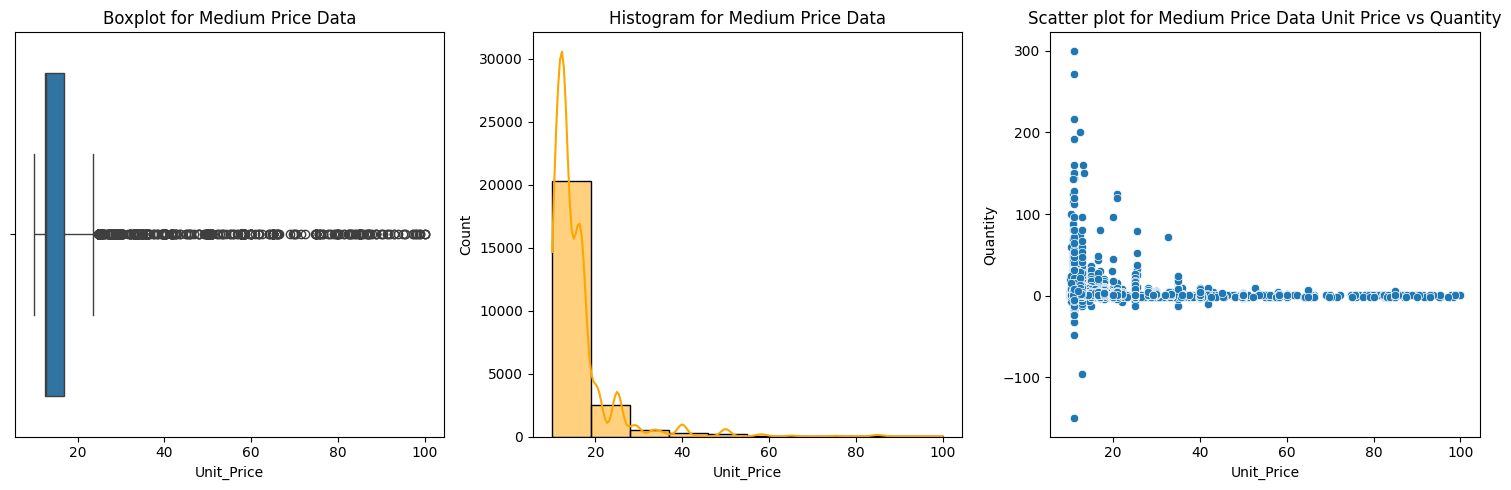

In [67]:
print(f"Number of Medium Priced Data Outliers (10-100): {med_price_outliers.shape[0]}")

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(x=med_price_df['Unit_Price'])
plt.title('Boxplot for Medium Price Data')

plt.subplot(1, 3, 2)
sns.histplot(med_price_df['Unit_Price'], kde=True, bins=10, color='orange')
plt.title('Histogram for Medium Price Data')

plt.subplot(1, 3, 3)
sns.scatterplot(x=med_price_df['Unit_Price'], y=med_price_df['Quantity'])
plt.title('Scatter plot for Medium Price Data Unit Price vs Quantity')

plt.tight_layout()
plt.show()



Methode 1: Capping/Winsorization

Number of IQR method outliers before capping: 2456
Number of IQR method outliers after capping: 0


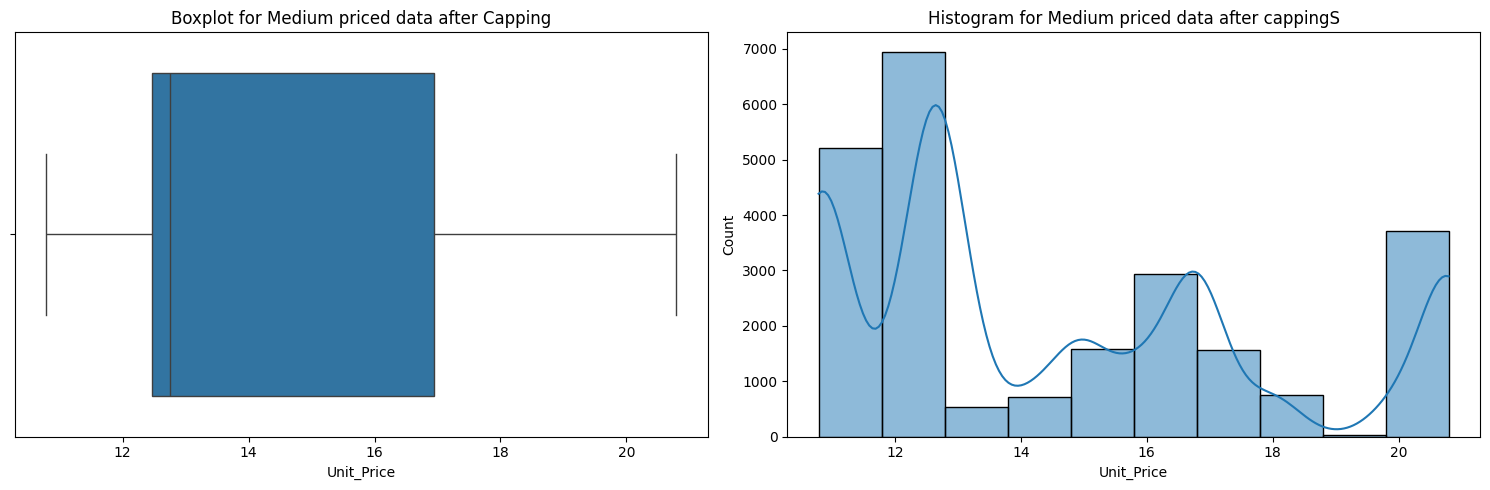

In [68]:
lower_bound = med_price_df['Unit_Price'].quantile(0.05)
upper_bound = med_price_df['Unit_Price'].quantile(0.88)   
# Cap values
capping_med = med_price_df['Unit_Price'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_capped_med = capping_med.quantile(0.25)
Q3_capped_med = capping_med.quantile(0.75)
IQR_capped_med = Q3_capped_med - Q1_capped_med

lower_limit_capped = Q1_capped_med - 1.5 * IQR_capped_med
upper_limit_capped = Q3_capped_med + 1.5 * IQR_capped_med

# Identify outliers based on IQR method before capping
print(f"Number of IQR method outliers before capping: {med_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after_med = capping_med[(capping_med < lower_limit_capped) | (capping_med > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after_med.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=capping_med)
plt.title('Boxplot for Medium priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(capping_med, kde=True, bins=10)
plt.title('Histogram for Medium priced data after cappingS')

plt.tight_layout()
plt.show()


Method 2: Log Transformation

Number of Outliers before Log Transformation: 2456
Number of Outliers after Log Transformation: 1348
Number of Data Points Removed 0


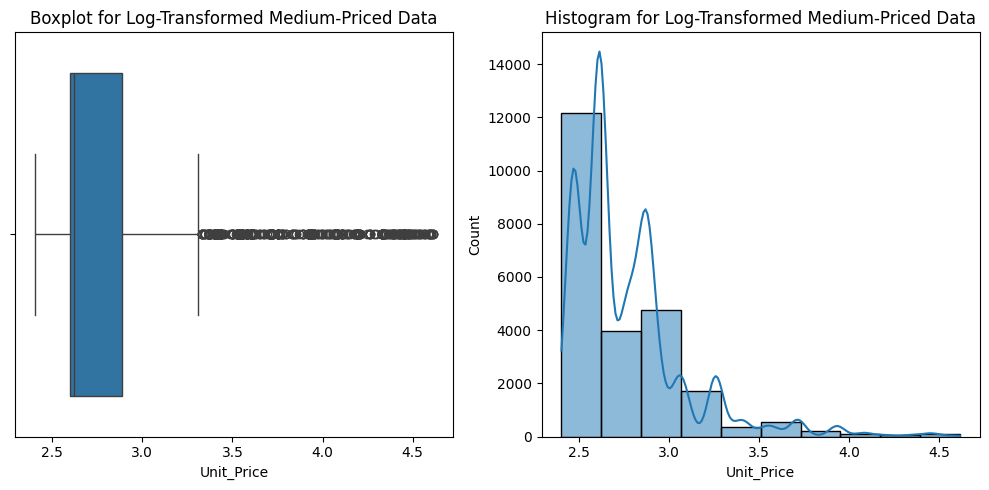

In [69]:
# Apply log transformation
log_trans_med = np.log1p(med_price_df['Unit_Price'])  # Use log1p to handle zeros

# Calculate IQR on the transformed data
Q1_log_med = log_trans_med.quantile(0.25)  # Use the transformed column
Q3_log_med = log_trans_med.quantile(0.75)
IQR_log_med = Q3_log_med - Q1_log_med

# Define lower and upper limits for outliers
lower_limit_log = Q1_log_med - 1.5 * IQR_log_med
upper_limit_log = Q3_log_med + 1.5 * IQR_log_med

# Identify outliers after log transformation
outliers_after_log = log_trans_med[(log_trans_med < lower_limit_log) | (log_trans_med > upper_limit_log)]

# Number of Outliers
print(f"Number of Outliers before Log Transformation: {med_price_outliers.shape[0]}")
print(f"Number of Outliers after Log Transformation: {outliers_after_log.shape[0]}")
print(f"Number of Data Points Removed {med_price_df.shape[0]-log_trans_med.shape[0]}")

# Plot the data0
plt.figure(figsize=(10, 5))

# Boxplot for transformed data
plt.subplot(1, 2, 1)
sns.boxplot(x=log_trans_med)
plt.title('Boxplot for Log-Transformed Medium-Priced Data')

# Histogram for transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_trans_med, kde=True, bins=10)
plt.title('Histogram for Log-Transformed Medium-Priced Data')

plt.tight_layout()
plt.show()


Methode 3: Square Root Transformation

Number of Outliers before Transformation: 2456
Number of Outliers after Square Root Transformation: 1595
Number of Data Points Removed 0


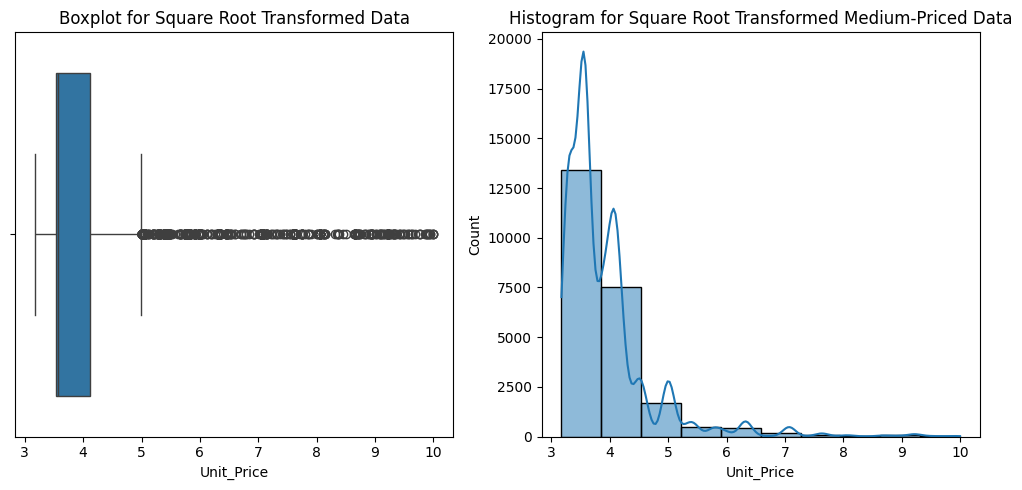

In [506]:
# Apply square root transformation
sqrt_trans_med = np.sqrt(med_price_df['Unit_Price'])

# Calculate IQR on the transformed data
Q1_sqrt_2 = sqrt_trans_med.quantile(0.25)
Q3_sqrt_2 = sqrt_trans_med.quantile(0.75)
IQR_sqrt_2 = Q3_sqrt_2 - Q1_sqrt_2

# Define lower and upper limits for outliers
lower_limit_sqrt = Q1_sqrt_2 - 1.5 * IQR_sqrt_2
upper_limit_sqrt = Q3_sqrt_2 + 1.5 * IQR_sqrt_2

# Identify outliers after square root transformation
outliers_after_sqrt = sqrt_trans_med[(sqrt_trans_med < lower_limit_sqrt) | (sqrt_trans_med > upper_limit_sqrt)]

# Number of Outliers
print(f"Number of Outliers before Transformation: {med_price_outliers.shape[0]}")
print(f"Number of Outliers after Square Root Transformation: {outliers_after_sqrt.shape[0]}")
print(f"Number of Data Points Removed {med_price_df.shape[0] - sqrt_trans_med.shape[0]}")

# Plot the data
plt.figure(figsize=(10, 5))

# Boxplot for transformed data
plt.subplot(1, 2, 1)
sns.boxplot(x=sqrt_trans_med)
plt.title('Boxplot for Square Root Transformed Data')

# Histogram for transformed data
plt.subplot(1, 2, 2)
sns.histplot(sqrt_trans_med, kde=True, bins=10)
plt.title('Histogram for Square Root Transformed Medium-Priced Data')

plt.tight_layout()
plt.show()


Again Capping is selected as it successfully handled outliers as compared to other two methods above

C:\Users\ghazi\AppData\Local\Temp\ipykernel_17816\903954687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_price_df['Unit_Price'] = med_price_df['Unit_Price'].clip(lower_bound, upper_bound)


Number of IQR method outliers before capping: 2456
Number of IQR method outliers after capping: 0


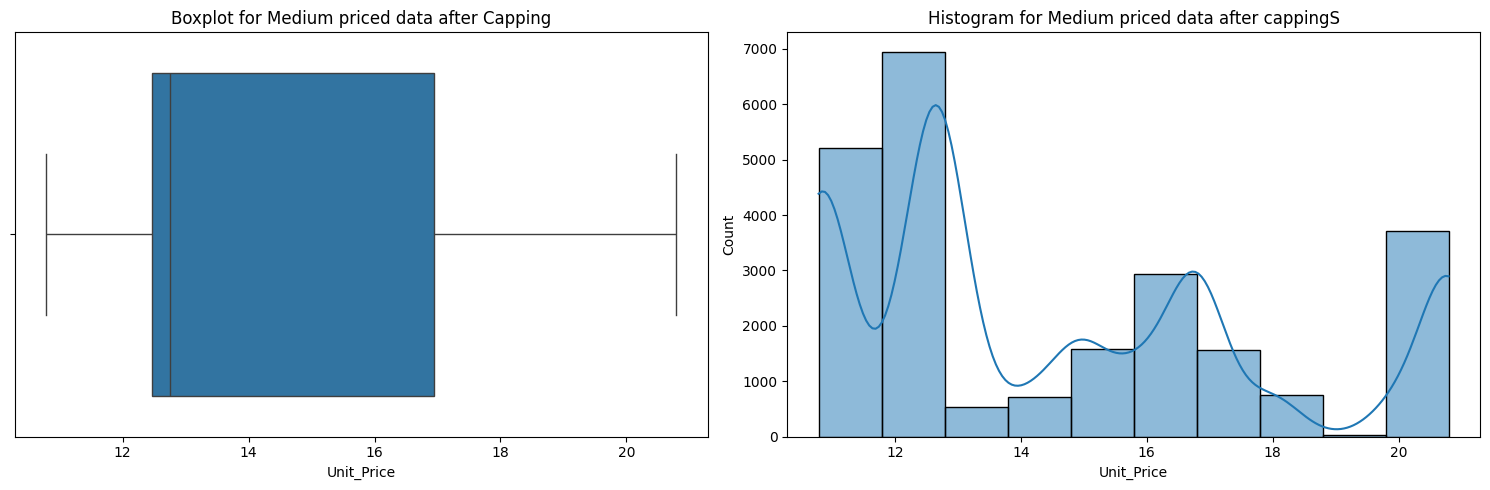

In [70]:
lower_bound = med_price_df['Unit_Price'].quantile(0.05)
upper_bound = med_price_df['Unit_Price'].quantile(0.89)   
# Cap values
med_price_df['Unit_Price'] = med_price_df['Unit_Price'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_capped_med = med_price_df['Unit_Price'].quantile(0.25)
Q3_capped_med = med_price_df['Unit_Price'].quantile(0.75)
IQR_capped_med = Q3_capped_med - Q1_capped_med

lower_limit_capped = Q1_capped_med - 1.5 * IQR_capped_med
upper_limit_capped = Q3_capped_med + 1.5 * IQR_capped_med

# Identify outliers based on IQR method before capping
print(f"Number of IQR method outliers before capping: {med_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after_med = med_price_df['Unit_Price'][(med_price_df['Unit_Price'] < lower_limit_capped) | (med_price_df['Unit_Price'] > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after_med.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=med_price_df['Unit_Price'])
plt.title('Boxplot for Medium priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(med_price_df['Unit_Price'], kde=True, bins=10)
plt.title('Histogram for Medium priced data after cappingS')

plt.tight_layout()
plt.show()


Medium Priced Quantity Outlier Handling

Number of IQR method outliers before capping: 2456
Number of IQR method outliers after capping: 0


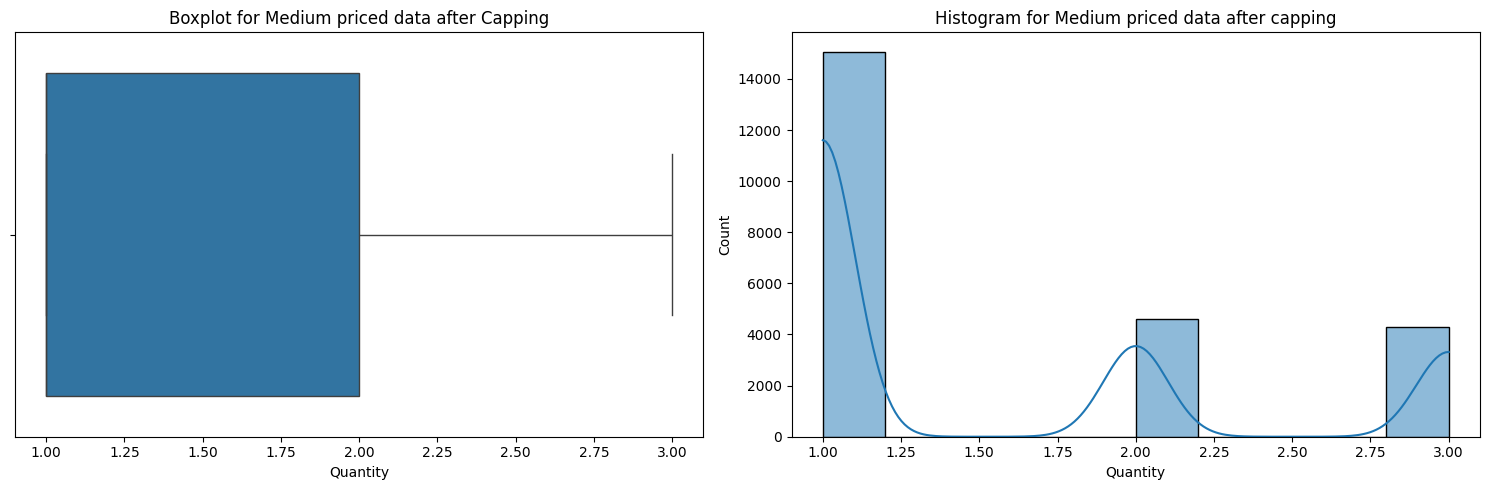

In [71]:
lower_bound = med_price_df['Quantity'].quantile(0.05)
upper_bound = med_price_df['Quantity'].quantile(0.85)   
# Cap values
capping_quan_med = med_price_df['Quantity'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_capped_quan_med = capping_quan_med.quantile(0.25)
Q3_capped_quan_med = capping_quan_med.quantile(0.75)
IQR_capped_quan_med = Q3_capped_quan_med - Q1_capped_quan_med

lower_limit_capped = Q1_capped_quan_med - 1.5 * IQR_capped_quan_med
upper_limit_capped = Q3_capped_quan_med + 1.5 * IQR_capped_quan_med

# Identify outliers based on IQR method before capping
print(f"Number of IQR method outliers before capping: {med_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after_med = capping_quan_med[(capping_quan_med < lower_limit_capped) | (capping_quan_med > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after_med.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=capping_quan_med)
plt.title('Boxplot for Medium priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(capping_quan_med, kde=True, bins=10)
plt.title('Histogram for Medium priced data after capping')

plt.tight_layout()
plt.show()


# DataFrame 3: High Priced Data

Number of High Price Outliers (>100): 120


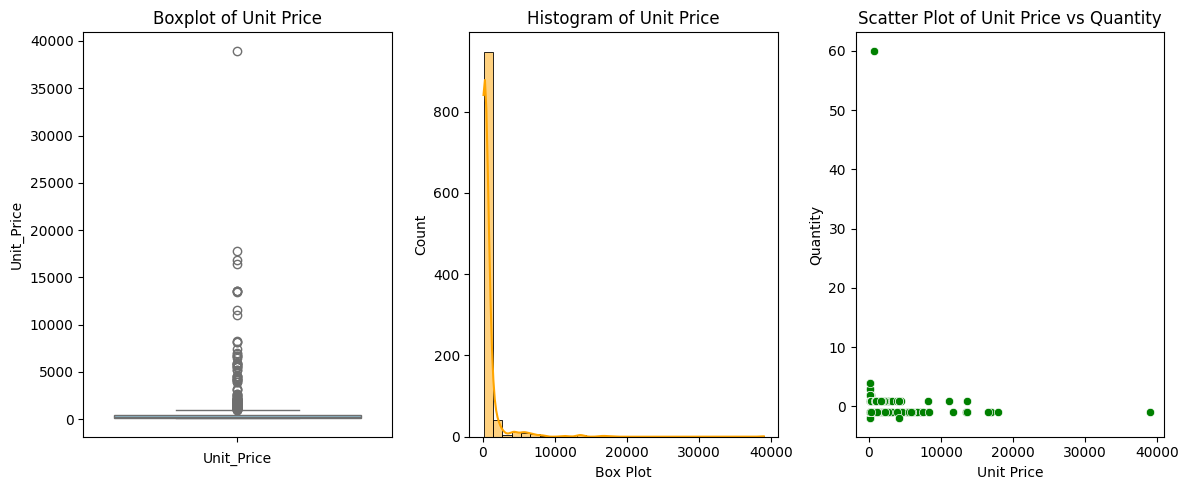

In [72]:
print(f"Number of High Price Outliers (>100): {high_price_outliers.shape[0]}")

plt.figure(figsize=(12, 5))
#boxplot 
plt.subplot(1, 3, 1)
sns.boxplot(high_price_df['Unit_Price'], color='skyblue')
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit_Price')
#Histogram
plt.subplot(1, 3, 2)
sns.histplot(high_price_df['Unit_Price'], kde=True, color='Orange', bins=30)
plt.title('Histogram of Unit Price')
plt.xlabel('Box Plot')
#Scatter Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=high_price_df['Unit_Price'], y=high_price_df['Quantity'], color='green')
plt.title('Scatter Plot of Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity') 

plt.tight_layout()
plt.show()


Methode 1: Capping/Winsorization

Number of IQR method outliers before capping: 120
Number of IQR method outliers after capping: 0


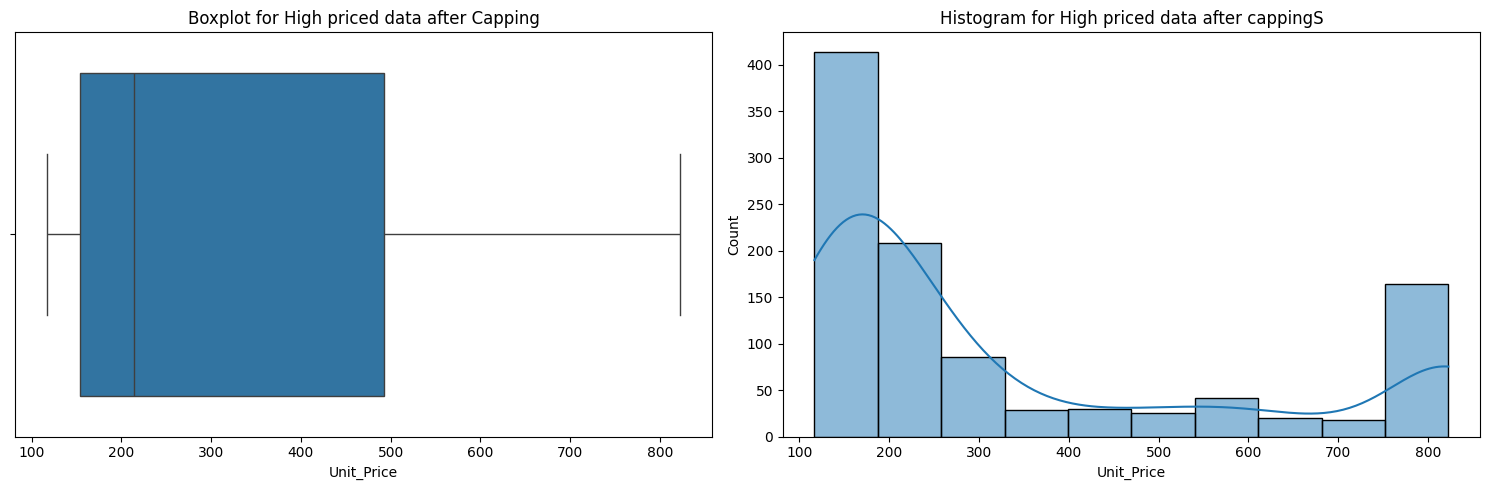

In [74]:
lower_bound = high_price_df['Unit_Price'].quantile(0.05)
upper_bound = high_price_df['Unit_Price'].quantile(0.85)   
# Cap values
capping_high = high_price_df['Unit_Price'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_capped_high = capping_high.quantile(0.25)
Q3_capped_high = capping_high.quantile(0.75)
IQR_capped_high = Q3_capped_high - Q1_capped_high

lower_limit_capped = Q1_capped_high - 1.5 * IQR_capped_high
upper_limit_capped = Q3_capped_high + 1.5 * IQR_capped_high

# Identify outliers based on IQR method before capping
print(f"Number of IQR method outliers before capping: {high_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after_high = capping_high[(capping_high < lower_limit_capped) | (capping_high > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after_high.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=capping_high)
plt.title('Boxplot for High priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(capping_high, kde=True, bins=10)
plt.title('Histogram for High priced data after cappingS')

plt.tight_layout()
plt.show()


Methode 2: Log Tranformation

Number of Outliers before Log Transformation: 120
Number of Outliers after Log Transformation: 46
Number of Data Points Removed 0


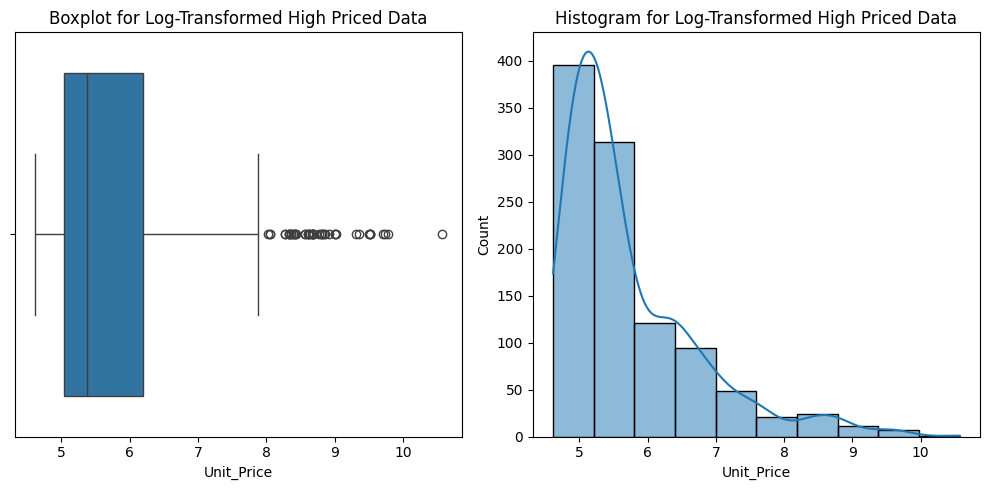

In [75]:
# Apply log transformation
log_trans_high = np.log1p(high_price_df['Unit_Price'])  # Use log1p to handle zeros

# Calculate IQR on the transformed data
Q1_log_high = log_trans_high.quantile(0.25)  # Use the transformed column
Q3_log_high = log_trans_high.quantile(0.75)
IQR_log_high = Q3_log_high - Q1_log_high

# Define lower and upper limits for outliers
lower_limit_log = Q1_log_high - 1.5 * IQR_log_high
upper_limit_log = Q3_log_high + 1.5 * IQR_log_high

# Identify outliers after log transformation
outliers_after_log_high = log_trans_high[(log_trans_high < lower_limit_log) | (log_trans_high > upper_limit_log)]

# Number of Outliers
print(f"Number of Outliers before Log Transformation: {high_price_outliers.shape[0]}")
print(f"Number of Outliers after Log Transformation: {outliers_after_log_high.shape[0]}")
print(f"Number of Data Points Removed {high_price_df.shape[0]-log_trans_high.shape[0]}")

# Plot the data0
plt.figure(figsize=(10, 5))

# Boxplot for transformed data
plt.subplot(1, 2, 1)
sns.boxplot(x=log_trans_high)
plt.title('Boxplot for Log-Transformed High Priced Data')

# Histogram for transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_trans_high, kde=True, bins=10)
plt.title('Histogram for Log-Transformed High Priced Data')

plt.tight_layout()
plt.show()


Methode 3: Square Root

Number of Outliers before Transformation: 120
Number of Outliers after Square Root Transformation: 88
Number of Data Points Removed 0


Text(0.5, 1.0, 'Histogram for Square Root Transformed Data')

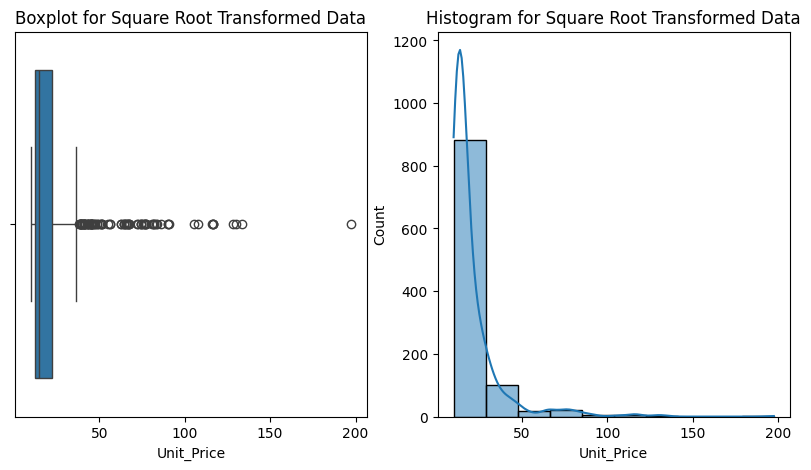

In [76]:
sqrt_trans_high = np.sqrt(high_price_df['Unit_Price'])

# Calculate IQR on the transformed data
Q1_sqrt_high = sqrt_trans_high.quantile(0.25)
Q3_sqrt_high = sqrt_trans_high.quantile(0.75)
IQR_sqrt_high = Q3_sqrt_high - Q1_sqrt_high

# Define lower and upper limits for outliers
lower_limit_sqrt = Q1_sqrt_high - 1.5 * IQR_sqrt_high
upper_limit_sqrt = Q3_sqrt_high + 1.5 * IQR_sqrt_high

# Identify outliers after square root transformation
outliers_after_sqrt = sqrt_trans_high[(sqrt_trans_high < lower_limit_sqrt) | (sqrt_trans_high > upper_limit_sqrt)]

# Number of Outliers
print(f"Number of Outliers before Transformation: {high_price_outliers.shape[0]}")
print(f"Number of Outliers after Square Root Transformation: {outliers_after_sqrt.shape[0]}")
print(f"Number of Data Points Removed {high_price_df.shape[0] - sqrt_trans_high.shape[0]}")

# Plot the data
plt.figure(figsize=(10, 5))

# Boxplot for transformed data
plt.subplot(1, 2, 1)
sns.boxplot(x=sqrt_trans_high)
plt.title('Boxplot for Square Root Transformed Data')

# Histogram for transformed data
plt.subplot(1, 2, 2)
sns.histplot(sqrt_trans_high, kde=True, bins=10)
plt.title('Histogram for Square Root Transformed Data')

Applying Capping method as log tranformation scale down the data messively

C:\Users\ghazi\AppData\Local\Temp\ipykernel_17816\1720859281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_price_df['Unit_Price'] = high_price_df['Unit_Price'].clip(lower_bound, upper_bound)


Number of IQR method outliers before capping: 120
Number of IQR method outliers after capping: 0


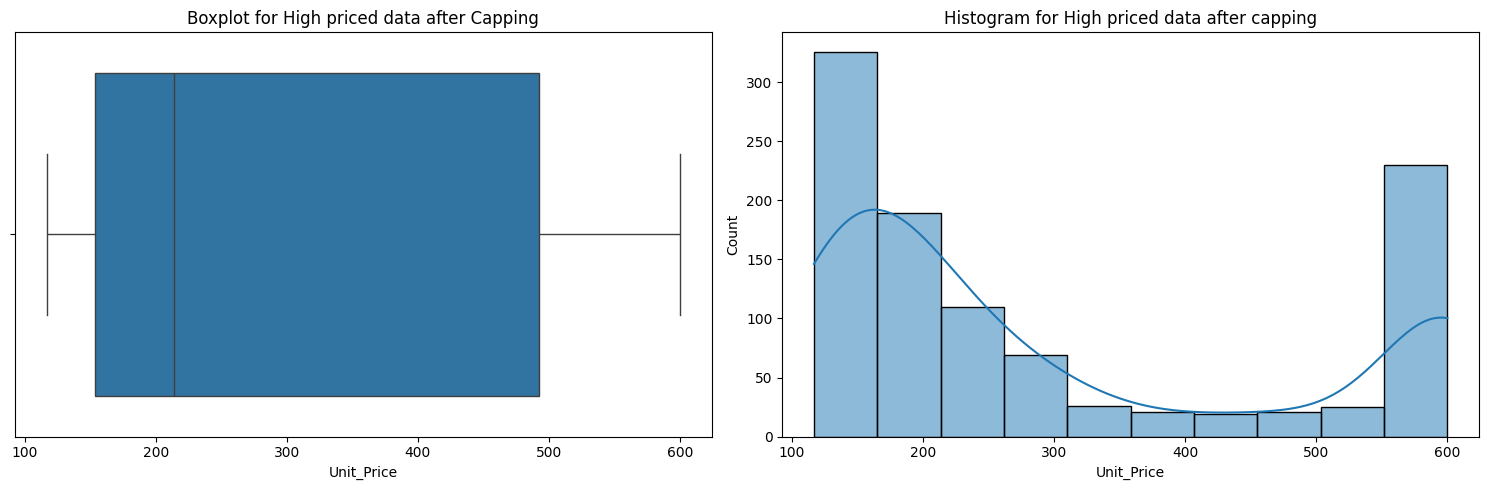

In [77]:
lower_bound = high_price_df['Unit_Price'].quantile(0.05)
upper_bound = high_price_df['Unit_Price'].quantile(0.80)   
# Cap values
high_price_df['Unit_Price'] = high_price_df['Unit_Price'].clip(lower_bound, upper_bound)

# Calculate IQR
Q1_capped_high = high_price_df['Unit_Price'].quantile(0.25)
Q3_capped_high = high_price_df['Unit_Price'].quantile(0.75)
IQR_capped_high = Q3_capped_high - Q1_capped_high

lower_limit_capped = Q1_capped_high - 1.5 * IQR_capped_high
upper_limit_capped = Q3_capped_high + 1.5 * IQR_capped_high

# Identify outliers based on IQR method before capping
print(f"Number of IQR method outliers before capping: {high_price_outliers.shape[0]}")

# Identify outliers based on IQR method after capping
outliers_iqr_after_high = high_price_df['Unit_Price'][(high_price_df['Unit_Price'] < lower_limit_capped) | (high_price_df['Unit_Price'] > upper_limit_capped)]
print(f"Number of IQR method outliers after capping: {outliers_iqr_after_high.shape[0]}")


# Plot capped values
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=high_price_df['Unit_Price'])
plt.title('Boxplot for High priced data after Capping')

plt.subplot(1, 2, 2)
sns.histplot(high_price_df['Unit_Price'], kde=True, bins=10)
plt.title('Histogram for High priced data after capping')

plt.tight_layout()
plt.show()


In [78]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_quantity = low_price_df['Quantity'].quantile(0.25)
Q3_quantity = low_price_df['Quantity'].quantile(0.75)

# Calculate the IQR
IQR_quantity = Q3_quantity - Q1_quantity

# Define lower and upper limits for outliers
lower_limit_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_limit_quantity = Q3_quantity + 1.5 * IQR_quantity

low_price_df['Quantity'] = low_price_df['Quantity'].clip(lower_limit_quantity, upper_limit_quantity)


C:\Users\ghazi\AppData\Local\Temp\ipykernel_17816\1955460470.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price_df['Quantity'] = low_price_df['Quantity'].clip(lower_limit_quantity, upper_limit_quantity)


In [79]:
low_price_df = low_price_df[low_price_df['Quantity'] > 0]

<Axes: ylabel='Quantity'>

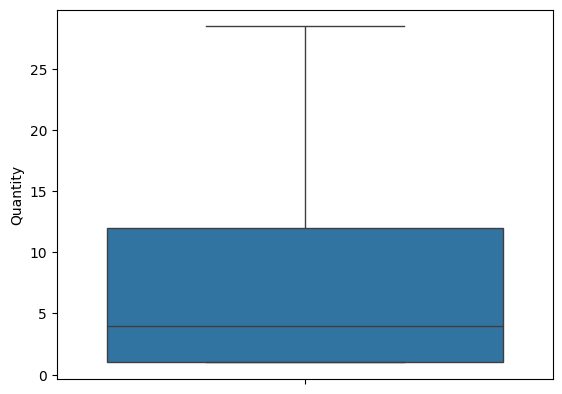

In [80]:
sns.boxplot(low_price_df.Quantity)

In [518]:
# Saving all three datasets separately
# All files will be saved in current working directory
low_price_df.to_csv('Low_Priced_Cleaned_df.csv', index=False)
med_price_df.to_csv('Medium_Priced_Cleaned_df.csv',index=False)
high_price_df.to_csv('High_Priced_Cleaned_df.csv',index=False)